## <p style="text-align: right;"> &#9989; (4 points) Heyue Cheng</p>

# CMSE 201 Final (Section 004 - Fall 2019)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed thus far this semester. In particular, you'll load, manipulate, and plot data using Pandas and Matplotlib; fit data using NumPy and/or SciPy; and describe agent-based models and think about how to create one. You should find that you have all of the skills necessary to complete this exam having completed CMSE 201!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. You might want to make sure you have access to any data you need and that you can get it loaded into your notebook sooner than later, in case you run into issues. Let your instructor know right away if you have problems with accessing the data.

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.** If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam. You are also expected to complete the exam **without** using old notebooks from class.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

---
## Part 1: Load, manipulate, and analyze data (using Pandas and Matplotlib) (32 points)

In this part you are asked to load, manipulate, and visualize data using Pandas. Specifically, the data set contains
GoodReads ratings and reviews of books.

 You'll be working with the "books.csv" file.

**Part 1, Question 1 (4 points)**: Load the data into your notebook **using Pandas** and then use Pandas to display the first 10 rows of the data.  *Hint: you can use `encoding = "ISO-8859-1"` to properly load the data.*

In [3]:
# import resources

import numpy as np
import pandas as pd
from pandas import DataFrame as df
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from pandas.plotting import lag_plot
from scipy.optimize import curve_fit

In [4]:
# load data and display the first 10 rows
books = pd.read_csv("books.csv", encoding = "ISO-8859-1")
books.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPr,4.56,439785960,9.780440e+12,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr,4.49,439358078,9.780440e+12,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPr,4.47,439554934,9.780440e+12,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPr,4.41,439554896,9.780440e+12,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPr,4.55,043965548X,9.780440e+12,eng,435,2149872,33964
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPr,4.78,439682584,9.780440e+12,eng,2690,38872,154
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,976540606,9.780980e+12,en-US,152,18,1
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9.780440e+12,eng,3342,27410,820
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9.780520e+12,eng,815,3602,258
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,345453743,9.780350e+12,eng,815,240189,3954


**Part 1, Question 2 (4 points)**: What built-in Pandas function can you use to get a quick statistic summary of your data (e.g. the mean, standard deviation, min, max, etc)? **Use this function to summarize the data and then answer the following questions**:

1. How many books are included in this dataset?
2. What are the mean and standard deviation values for the "average_rating", "num_pages"? 

In [5]:
# statistics summary
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,13713.000000,13713.000000,1.371300e+04,13713.000000,1.371300e+04,13713.000000
mean,22158.832932,3.930618,9.764015e+12,342.402611,1.776669e+04,533.671042
std,13700.899263,0.357906,3.987824e+11,252.659377,1.129612e+05,2529.094802
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.000000,3.770000,9.780350e+12,196.000000,8.300000e+01,7.000000
50%,21321.000000,3.960000,9.780610e+12,301.000000,6.310000e+02,40.000000
75%,33308.000000,4.130000,9.780940e+12,421.000000,4.743000e+03,222.000000
max,47709.000000,5.000000,9.790010e+12,6576.000000,5.629932e+06,93619.000000


In [6]:
# number of books
print(len(books) ,"books are included in the data")

13713 books are included in the data


In [7]:
# mean and std
print("The mean for average_rating is:",np.mean(books["average_rating"]))
print("The std for average_rating is:",np.std(books["average_rating"]))

print("The mean for num_pages is:",np.mean(books["num_pages"]))
print("The std for num_pages is:",np.std(books["num_pages"]))

The mean for average_rating is: 3.930617662072486
The std for average_rating is: 0.35789297552441524
The mean for num_pages is: 342.4026106614162
The std for num_pages is: 252.65016447023288


 **Part 1, Question 3 (4 points)**: What are the top 10 books with the most ratings_count? 

*Hint*: You might want to search for a way to sort a pandas dataframe by a given column.



In [11]:
# Put your code here
#df.sort_values(int(books["ratings_count"]), by=['col5'], axis = 0, ascending=False, na_position='first')

books.sort_values(by=['ratings_count'],na_position='first',ascending=False).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPr,4.47,439554934,9.780440e+12,eng,320,5629932,70390
12242,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9.780320e+12,eng,498,4367341,93619
2000,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.26,618260307,9.780620e+12,eng,366,2364968,31664
1717,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9.780320e+12,eng,277,2318478,42016
340,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.88,1416524797,9.781420e+12,eng,736,2279854,20851
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPr,4.55,043965548X,9.780440e+12,eng,435,2149872,33964
5300,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPrÌ©,4.41,439064864,9.780440e+12,eng,341,2115562,32694
2505,7613,Animal Farm,George Orwell,3.91,452284244,9.780450e+12,eng,122,2102616,29469
25,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.35,618346252,9.780620e+12,eng,398,2009749,12784
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr,4.49,439358078,9.780440e+12,eng,870,1996446,27613


**Part 1, Question 4 (6 points)**: Create a new data frame called `popbooks` that consists of popular books, which are books with ratings_count bigger than or equal to 10000. How many books are in this new data frame? **You should be able to determine this using masks.**

In [19]:
# Put your code here
#data = [books["col2"],books["col9"]]
#df = pd.DataFrame(data)
#popbooks = pd.Series("col9")
#popbooks.mask(["popbooks"]>=10000)
#df

popbooks = books[books["ratings_count"] >=10000]
print(len(popbooks))



2354


 **Part 1, Question 5 (4 points)**: In `popbooks`, what are the 10 books with the highest average_rating? 





In [21]:
# Put your code here
popbooks.sort_values(by=['average_rating'],na_position='first',ascending=False).head(10)["title"]


7922                        The Complete Calvin and Hobbes
5        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
7924          It's a Magical World (Calvin and Hobbes #11)
7925                   The Indispensable Calvin and Hobbes
7             Harry Potter Collection (Harry Potter  #1-6)
7926     Homicidal Psycho Jungle Cat (Calvin and Hobbes...
7928                              The Days Are Just Packed
7815                The Calvin and Hobbes Lazy Sunday Book
7564                      The Absolute Sandman  Volume One
12533    The Essential Calvin and Hobbes: A Calvin and ...
Name: title, dtype: object

**Part 1, Question 6 (6 points)**: Now, for dataframe `popbooks`, explore the relation between the number of reviews with number of text reviews, also number of reviews with average ratings; *which means the correlation between ratings_count and text_reviews_count, and rating_count and average_rating*. **What is your assessment?** Make plots of the data and **state the conclusion you reach**.

In [23]:
# Put your code here



**Part 1, Question 7 (4 points)**: Suppose in the winter break, you want to read books that have average_rating over 4.2, with at least 10000 rating_count, and 3000 num_pages, what will be your choice?

In [10]:
# Put your code here


---
## Part 2: Fit data using NumPy and/or SciPy (32 points)

In this part of the exam, you're going to be working with a set of mystery data, aptly named "mystery.csv". Since you don't have any idea exactly what this data represents, you're going to explore various models that might serve as good representations of the general trends within the data.

First off, lets make sure we get the dataset loaded into our notebook correctly.

**Run the cell below!** This method for loading in the data should look familiar to you!

In [11]:
import numpy as np
x,y = np.loadtxt("mystery.csv",delimiter=",",unpack=True)

**Part 2, Question 1 (4 points)**: Now that you've loaded in the data, make a plot that shows how `y` changes as a function of `x`. You should make sure to format your plot so that it's easy to see the relationship between `x` abd `y`. You should also include useful things like axis labels! (Also, feel free to use seaborne if you want to change the overall look of your plot).

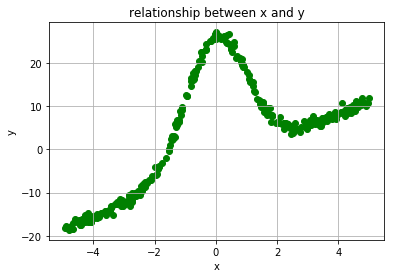

In [12]:
# Put your code here
plt.scatter(x,y,color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("relationship between x and y")
plt.grid()


**Part 2, Question 2 (2 points)**: Before you start trying to fit any sort of models, what features do you see in the data? Describe any patterns or large scale behavior you notice in the data.

*The data goes up reach the max point and then goes down reach the min point and do the cycle again repeatly. It seems to have a periodic pattern similar as "sin" model.*

**Part 2, Question 3 (8 points)**: Now, let's try to use a linear polynomial to get the overall trend of the data.

Now do the following:

1. Use NumPy's `polyfit` function to fit a polynomial of degree 1 to the data.
2. Use `poly1d` to create a function that can be used to plot the best fit curve on top of the data.
3. Generate 300 evenly spaced values between -5 and 5 and store those in a new variable called `x_model`
4. Plot the data and then overplot the `y_model` values that correspond to the `x_model` values you just created. You should be able to use the function you created using `poly1d` to do this!

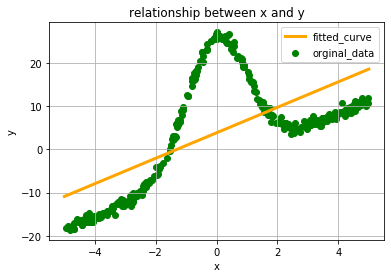

In [131]:
# Put your code here
poly_parameters = np.polyfit(x,y,1)
y_model = np.poly1d(poly_parameters)
x_model = np.linspace(-5,5,300)

plt.scatter(x,y,color="green",label="orginal_data")

plt.plot(x_model,y_model(x_model),color="orange",linewidth=3,label="fitted_curve")
plt.xlabel("x")
plt.ylabel("y")
plt.title("relationship between x and y")
plt.legend()
plt.grid()

**Part 2, Question 4 (4 points)**: How well does this model appear to fit the data? What are the best fit parameters for this model? Are there features that still aren't captured by this model? If so, comment on which features these are.

*This model with degree 1 just show a general trend of the actual points but not with concrete features. The best fit paramaters here is 20. With degree 20, it almost captureed everything.*

**Part 2, Question 5 (4 points)**: Would a higher order polynomial fit the data better? Try fitting higher order polynomials and decide which one you think provides the "best" overall fit to the data. **Defend your choice below!**

*Note*: you may have to experiment a higher order polynomial than you might have ever previously tried! This is where `poly1d` really comes in handy!

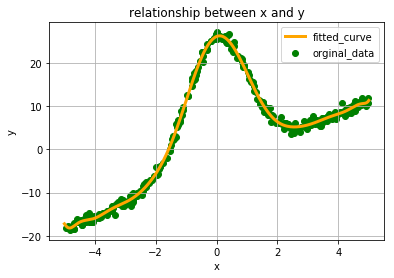

In [14]:
# create a new function with second order
poly_parameters = np.polyfit(x,y,20)
y_model = np.poly1d(poly_parameters)
x_model = np.linspace(-5,5,300)

plt.scatter(x,y,color="green",label="orginal_data")

plt.plot(x_model,y_model(x_model),color="orange",linewidth=3,label="fitted_curve")
plt.xlabel("x")
plt.ylabel("y")
plt.title("relationship between x and y")
plt.legend()
plt.grid()

*Defend your choice for the "best" polynomial that fits the data here!*

*I tried many times and finally found degree 20 is the best fit parameter since the fitted curve totally showed every changes and trends with the original data.*

**Part 2, Question 6 (8 points)**: Although you might have been able to get a decent fit to the data using a higher order polynomial, it seem like such a polynomial is an overly complex way of fitting the data. Instead of just experimenting with `polyfit`, it might make more sense to use SciPy's `curve_fit` to fit a simple model to the data.

As you've hopefully noticed at this point, the second order polynomial seemed to do a good job of fitting the large scale behavior of the data, but there also appears to be a periodic signal in the data as well.

**Define a new function that combines a first order polynomial and a Gaussian function  centered at 0  $a\exp(-b\cdot x^2)$  and use `curve_fit` to find the best fit parameters for this new function.**

*Hint*: You may need to experiment with the `p0` parameters that you can feed into `curve_fit` to get a model that captures the feature of the dataset. Even if you can't get a perfect fit, you'll still get partial credit for setting up the problem correctly!

[26.81999588  0.67677814]


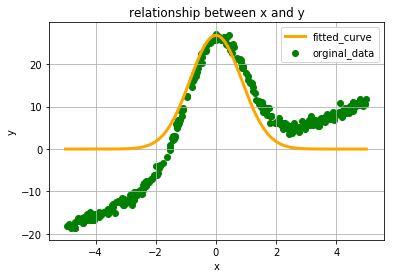

In [23]:
# An important import command!
from scipy.optimize import curve_fit

# Put your code here
def new_function(x,a,b):
    return a*np.exp(-b*x**2)

# use curvefit to find the best fit parameter
popt,pcov = curve_fit(new_function,x,y,p0=[1,1])
print(popt)

# four elements in p0
a=popt[0]
b=popt[1]


# call the function
new=new_function(x_model,a,b)

# plot the figure
plt.plot(x_model,new,color="orange",label="fitted_curve",linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("relationship between x and y")

plt.scatter(x,y,color="green",label="orginal_data")
plt.legend()
plt.grid()

**Part 2, Question 7 (2 points)**: Were you able to get a better looking fit for the model? How do your best fit parameters from `curve_fit` compare to the best fit parameters from your linear polynomial fit? Are any of them roughly the same? If so, discuss whether or not this what you would expect.

*Yes, I got a better fit for this model. This one fits much better than the linear one since this one shows the trends and directions as the data changes. The fitted curve from 10 to 25 on y axis are almost same as the original data.*

---
## Part 3: Describe what an agent-based model is and come up with a plan for building one (32 points)

**Part 3, Question 1 (8 points)**: Explain, **in your own words**, what an agent-based model is.

*Agent based modeling focuses on the individual active components of a system. With agent based modeling, active entities, known as agents, must be identified and their behavior defined. They may be people, households, vehicles, equipment, products, or companies, whatever is relevant to the system. Stochasticity can be included in the assignment of agent characteristics and in determining which agents interact and how agents obtain information and make decisions. The model is run over time and repeated numerous times, to obtain a distribution of possible outcomes for the specified system.*


**Part 3, Question 2 (8 points)**: Give **two** examples of systems or problems that can be modeled using agent-based models and describe what the agents would be and what rules that control their behavior are.

1. Analyzing the Spread of Epidemics. Build a simulated model of the host area’s environment. I may have a city with an extensive public transportation network as well as the saturated central business area. I could set rules for the agents, such as how frequently they take the trains and buses, the fact that they go to a food court for lunch, and other common interactions.The simulation will show you how fast and extensively the disease in question would spread.
2. Studying Consumer Behavior. I may identify the psychological triggers that compel consumers to select a particular brand over that brand’s competition. Researchers may use decoy effects and multi-agent systems (MAS) in these studies as well. When defining rules for the consumer (i.e., the agent), researchers could draw on existing data about how past customers sought products/services. For example, the time they had spent in the store, the length of time they spent viewing a web page, etc.

**Part 3, Question 3 (16 points)**: Imagine that you're trying to build an agent-based model that simulates crowd dynamics in Disneyland after Christmas on Dec 26 that opens during 8am to 12am. Human crowd is an intriguing social phenomena in nature. Crowd modelling and simulation has become an important tool to analyse the impact of crowd behaviours in a wide range of applications including safety planning, architecture design, virtual reality and military training.

In thinking about how one might build this model: Who would be the agents in your model? Do agents move about within your model world or are they static? What decides where the agents move? You need to consider the initial condition (when park opens at 8am) and final conditions (when park closes at 12am).  


Your job is to **formulate a plan for an agent-based model** that identifies the agents in your model, defines the rules for how those agents behave, and describes how you would go about building the "world" that your agents live in.

You should make sure you:

* Identify the agent(s) in your model
* Define a set of rules for how your agents behave with each successive time step.
* Describe how you would go about defining the world that your agents lives in and any elements in the world that must exist for your agents to move, interact, etc. Make sure you articulate what the initial conditions are for you model!

Some of your discussion should involve how you would keep track of all of the parts of your model using Python. **You do not have to write any code for this part of the exam!** However, if you wish to write some code to illustrate your point, you are welcome to do so.

* The agents are each category of human behaviors in Disneyland. for example, taking photos, eating, interacting with Disney characters.
* Rules: Behaviors in this model only contain specific 3 aspects as I showed above. Any other related bahaviors should considered to be one of the defined behaviors. Like drinking water should considered as eating in this model.
* world: Disneyland park with defined values of tickets. Elements includes restaurants and playground etc

---
## You're done! Congrats on finishing your CMSE 201 Final!

Upload a copy of this notebook to the submission folder on D2L and make sure your name is on it! Thank you for a great semester!